In [6]:
import networkx as nx
import osmnx as ox
from matplotlib import pyplot as plt
from shapely.geometry.linestring import LineString
from shapely.geometry.point import Point

import bachelors_thesis.util as util

In [7]:
data_path = "../../data"

In [8]:
# Fetch OSMnx graph
road_graph = ox.graph_from_bbox(bbox=(113.95088, 22.57502, 114.08323, 22.71175), network_type="drive", simplify=False)
print("Road Graph OSMnx:")
print(road_graph)

road_graph = ox.add_edge_speeds(road_graph)
road_graph = ox.add_edge_travel_times(road_graph)

# Remove self-loops
road_graph.remove_edges_from(nx.selfloop_edges(road_graph))

# Save road graph
util.save_graph(road_graph, f"{data_path}/road_graph/road_graph_ox_nsl.pickle")
# road_graph_ox = util.load_graph(f"{data_path}/road_graph/road_graph_ox_nsl.pickle")
print("Road Graph OSMnx (nsl):")
print(road_graph)

# Simplify road graph
road_graph = ox.simplify_graph(road_graph, track_merged=True)

# Add geometry for edges that don't have any
for u, v, data in road_graph.edges(data=True):
    if "geometry" not in data:
        line = LineString([Point((road_graph.nodes[u]["x"], road_graph.nodes[u]["y"])),
                           Point((road_graph.nodes[v]["x"], road_graph.nodes[v]["y"]))])
        data["geometry"] = line

# Save simplified road graph
util.save_graph(road_graph, f"{data_path}/road_graph/road_graph_ox_nsl_sim.pickle")
print("Road Graph OSMnx (nsl, sim):")
print(road_graph)

# Reduce road graph to largest strongly-connected component
sccs = nx.strongly_connected_components(road_graph)
max_scc = max(sccs, key=len)
max_scc_sub_road_graph = road_graph.subgraph(max_scc).copy()
print("Road Graph OSMnx (nsl, sim, sc):")
print(max_scc_sub_road_graph)

# Save largest strongly-connected road graph
util.save_graph(max_scc_sub_road_graph, f"{data_path}/road_graph/road_graph_ox_nsl_sim_sc.pickle")

Road Graph OSMnx:
MultiDiGraph with 41456 nodes and 58920 edges
Road Graph OSMnx (nsl):
MultiDiGraph with 41456 nodes and 58920 edges
Road Graph OSMnx (nsl, sim):
MultiDiGraph with 6254 nodes and 12448 edges
Road Graph OSMnx (nsl, sim, sc):
MultiDiGraph with 6003 nodes and 12063 edges


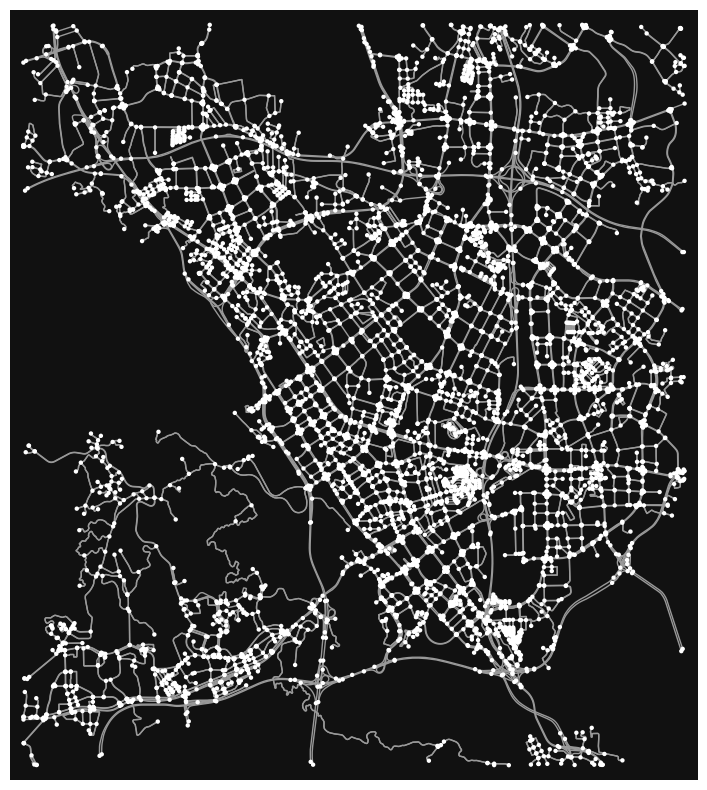

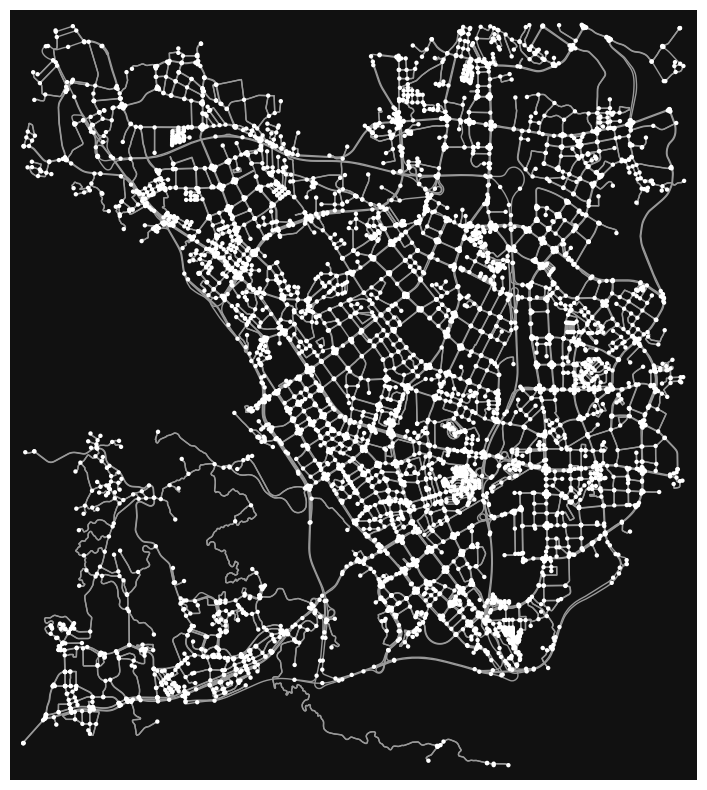

In [9]:
# Draw the road graph
fig, ax = ox.plot_graph(
    road_graph,
    node_size=10,
    figsize=(10, 10)
)
ax.set_title("Road Graph OSMnx (nsl, sim)")

fig, ax = ox.plot_graph(
    max_scc_sub_road_graph,
    node_size=10,
    figsize=(10, 10)
)
ax.set_title("Road Graph OSMnx (nsl, sim, sc)")

plt.show()